In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data
df = pd.read_csv("wingstop_cleaned_data.csv")

In [3]:
# Setup
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [4]:
# 1. Basic Overview
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Stats:\n", df.describe())


Shape: (100, 19)

Data Types:
 order_id                  int64
order_time               object
delivery_time_mins        int64
order_value_usd         float64
customer_rating         float64
review_text              object
order_hour                int64
location_Houston          int64
location_Los Angeles      int64
location_New York         int64
location_Phoenix          int64
order_type_Dine-in        int64
order_type_Takeaway       int64
weekday_Monday            int64
weekday_Saturday          int64
weekday_Sunday            int64
weekday_Thursday          int64
weekday_Tuesday           int64
weekday_Wednesday         int64
dtype: object

Missing Values:
 order_id                0
order_time              0
delivery_time_mins      0
order_value_usd         0
customer_rating         0
review_text             0
order_hour              0
location_Houston        0
location_Los Angeles    0
location_New York       0
location_Phoenix        0
order_type_Dine-in      0
order_type_Takeaw

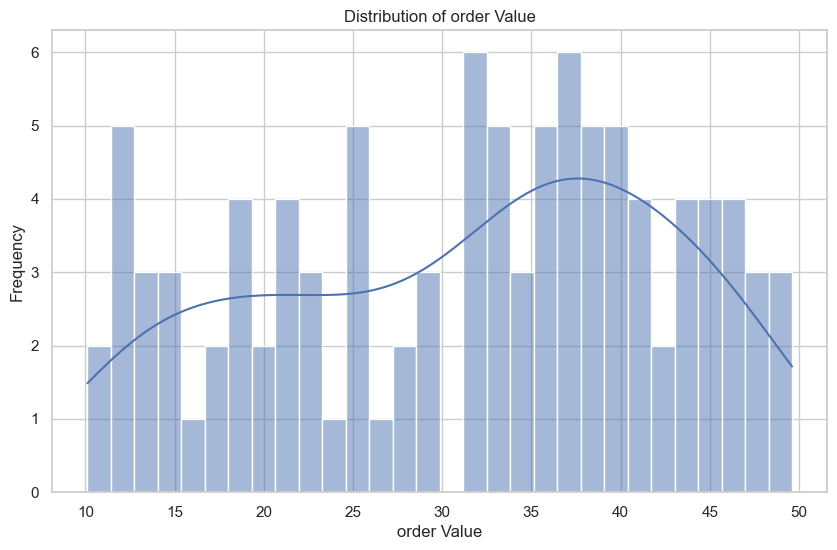

In [5]:
# 2. Univariate Analysis

# Histogram - Order Value
sns.histplot(df['order_value_usd'], bins=30, kde=True)
plt.title("Distribution of order Value")
plt.xlabel("order Value")
plt.ylabel("Frequency")
plt.show()

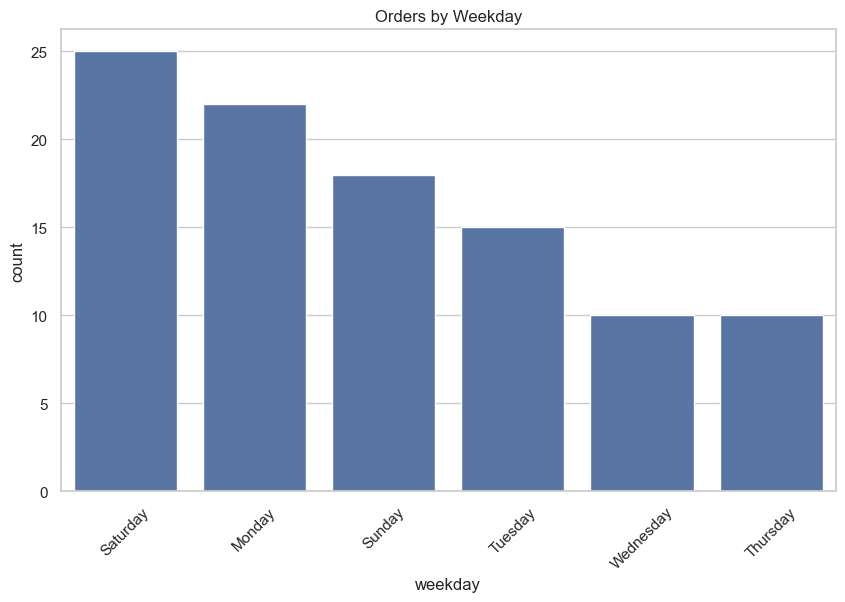

In [6]:
# Get weekday columns
weekday_columns = [col for col in df.columns if col.startswith('weekday_')]

# Melt one-hot into single 'weekday' column
df['weekday'] = df[weekday_columns].idxmax(axis=1).str.replace('weekday_', '')

# Barplot - Weekday
sns.countplot(x='weekday', data=df, order=df['weekday'].value_counts().index)
plt.title("Orders by Weekday")
plt.xticks(rotation=45)
plt.show()


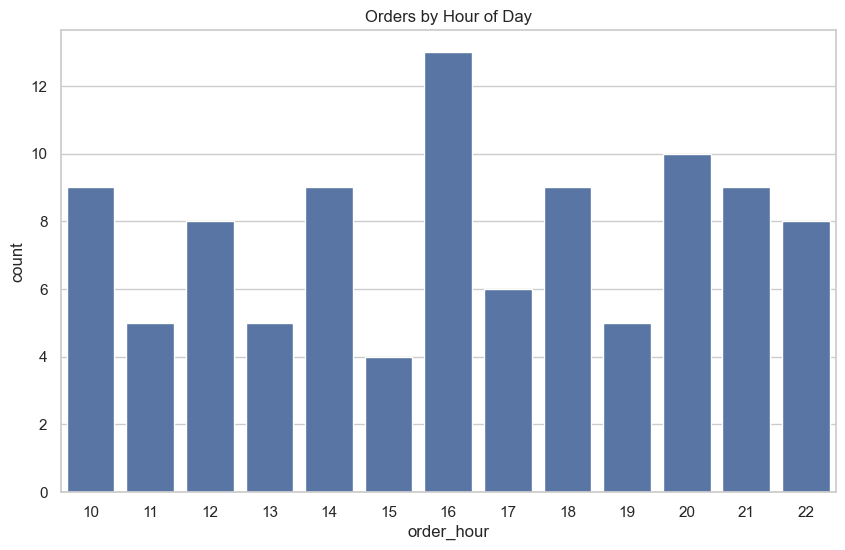

In [10]:
# Barplot - Hour
sns.countplot(x='order_hour', data=df)
plt.title("Orders by Hour of Day")
plt.show()


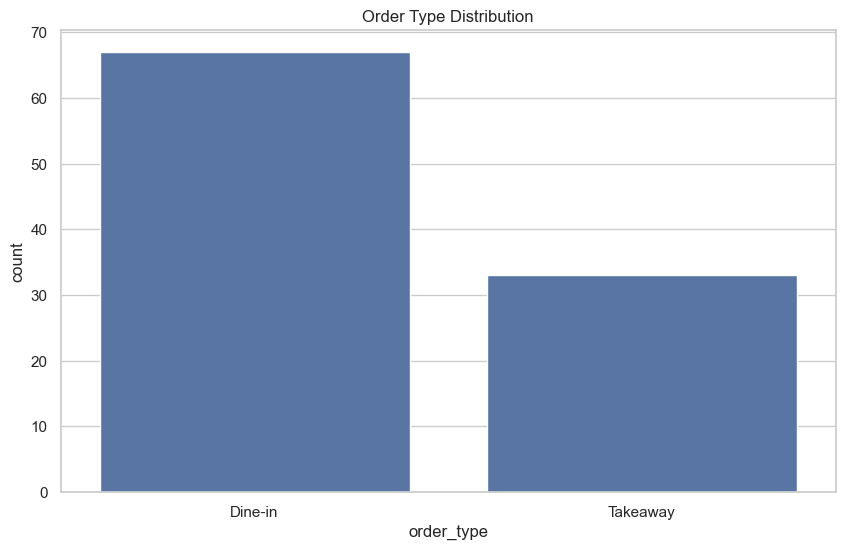

In [15]:
# Reconstruct 'order_type' column
df['order_type'] = df[['order_type_Dine-in', 'order_type_Takeaway']].idxmax(axis=1).str.replace('order_type_', '')

# Barplot - Order Type
if 'order_type' in df.columns:
    sns.countplot(x='order_type', data=df)
    plt.title("Order Type Distribution")
    plt.show()

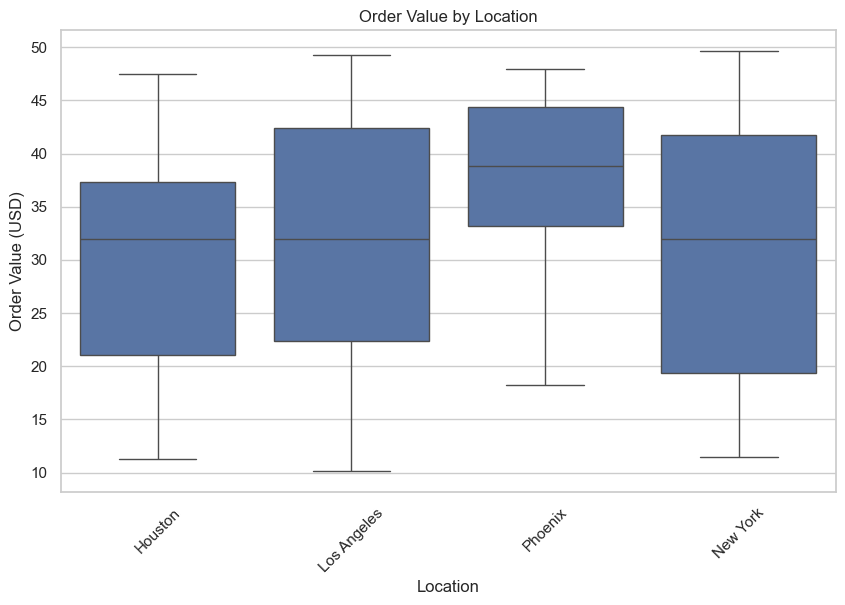

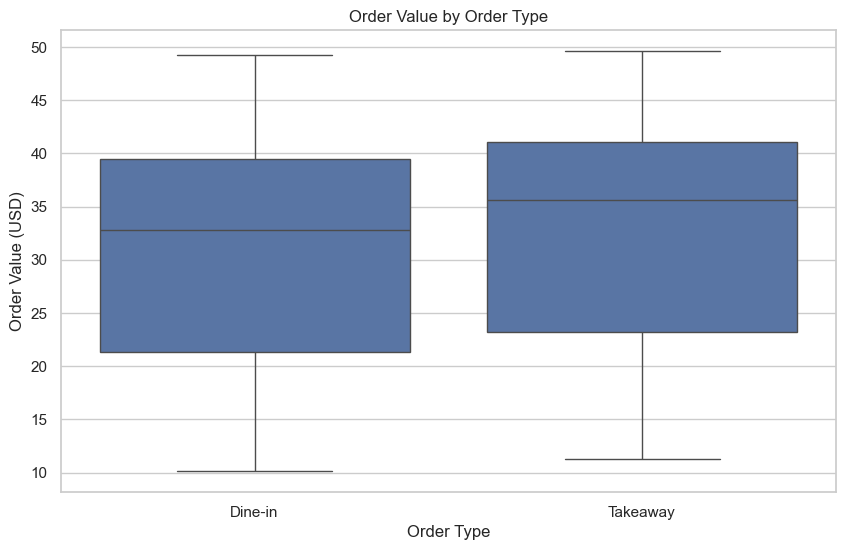

In [18]:
# Convert one-hot encoded 'location' columns to a single 'location' column
location_cols = [col for col in df.columns if col.startswith('location_')]
df['location'] = df[location_cols].idxmax(axis=1).str.replace('location_', '')

# Convert one-hot encoded 'order_type' columns to a single 'order_type' column
order_type_cols = [col for col in df.columns if col.startswith('order_type_')]
df['order_type'] = df[order_type_cols].idxmax(axis=1).str.replace('order_type_', '')

# Boxplot - Order Value by Location
sns.boxplot(x='location', y='order_value_usd', data=df)
plt.title("Order Value by Location")
plt.ylabel("Order Value (USD)")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()

# Boxplot - Order Value by Order Type
sns.boxplot(x='order_type', y='order_value_usd', data=df)
plt.title("Order Value by Order Type")
plt.ylabel("Order Value (USD)")
plt.xlabel("Order Type")
plt.show()

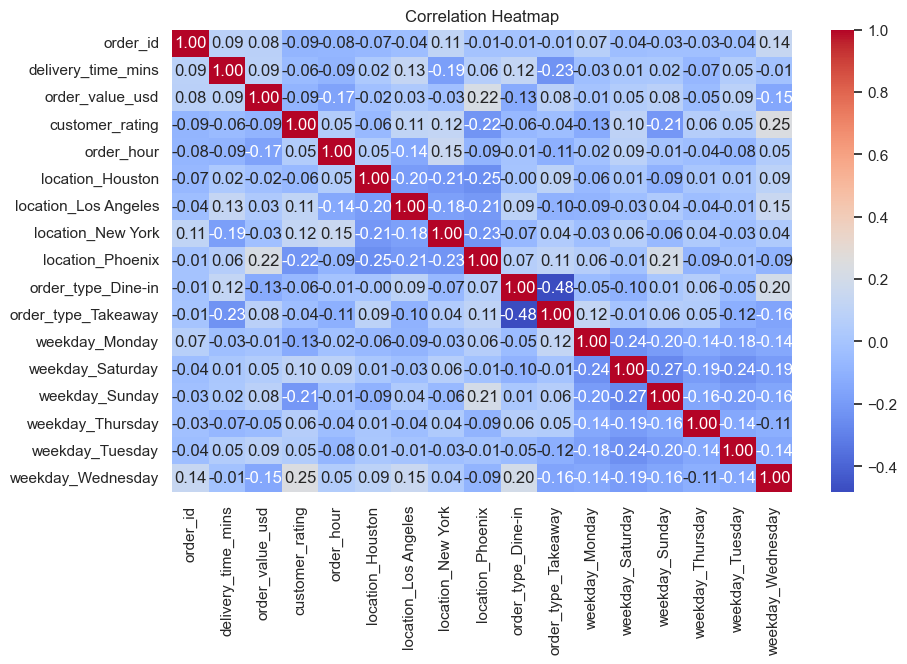

In [19]:
# 4. Correlation Matrix
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()